In [2]:

import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from IPython.display import Image
import os 
import sys


In [3]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from visualization import *


Let's explore the data that we have trained the model using mlflow which are saved. 

In [5]:
test_feature = pd.read_csv("../features/test_features.csv")
test_feature.head(5)

,experiment,hour,date_of_week,date_of_month,device_make,platform_os,browser
0,1,0,4,10,10,1,1
1,1,21,3,9,0,1,0
2,0,15,4,3,0,1,0
3,1,3,2,8,0,1,0
4,1,20,3,9,0,1,0


In [6]:
test_labels = pd.read_csv("../features/test_labels.csv")
test_labels.head(5)

,aware
0,1
1,0
2,0
3,0
4,1


In [7]:
feature_columns = [f.replace('_', ' ').capitalize() for f in test_feature]
feature_columns

['Experiment',
 'Hour',
 'Date of week',
 'Date of month',
 'Device make',
 'Platform os',
 'Browser']

In [8]:
test_feature

,experiment,hour,date_of_week,date_of_month,device_make,platform_os,browser
0,1,0,4,10,10,1,1
1,1,21,3,9,0,1,0
2,0,15,4,3,0,1,0
3,1,3,2,8,0,1,0
4,1,20,3,9,0,1,0
...,...,...,...,...,...,...,...
120,1,10,4,3,0,1,0
121,1,4,0,6,0,1,0
122,1,21,6,5,0,1,0
123,1,21,3,9,0,1,1


### Logistic Regression



In [9]:
model = pickle.load(open("../models/logistic_model.pickle", "rb"))
model


LogisticRegression(random_state=42, solver='newton-cg')

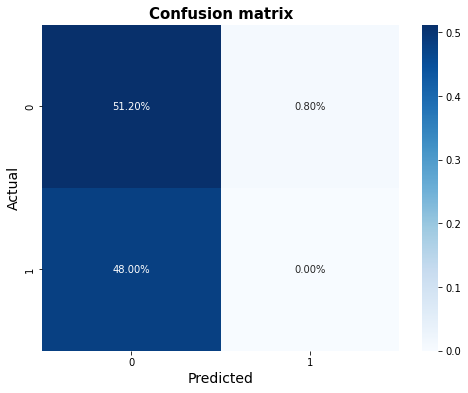

In [10]:
y_preds = model.predict(test_feature)
plot_confusion_metrics(test_labels, y_preds)

### Important Feature


In [11]:
imp_featur = pd.DataFrame({"Important Feature":model.coef_[0]})
imp_featur['Feature'] = feature_columns
imp_featur = imp_featur.set_index('Feature')
imp_featur = imp_featur.sort_values(by=['Important Feature'], ascending=False)
imp_featur

,Important Feature
Feature,
Platform os,0.59
Experiment,0.05
Hour,0.02
Date of week,0.01
Date of month,0.01
Device make,0.00
Browser,-0.01


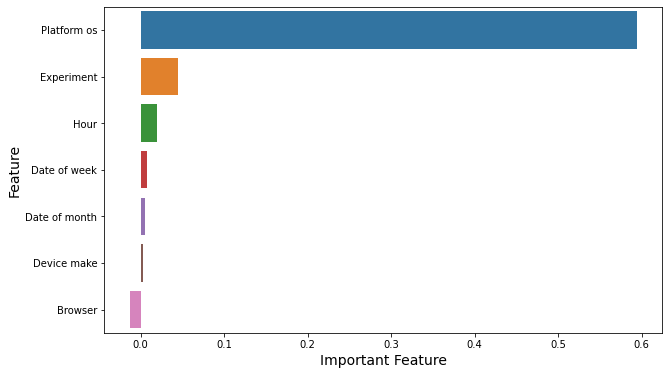

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Important Feature", y=imp_featur.index, data=imp_featur)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Important Feature', fontsize=14)
plt.show()

In the plot above we can see the importance of each feature on brand awareness. 
The Platform os is the important feature for brand awerness.

### XGBoost

In [14]:
xgboost_model= pickle.load(open("../models/xgboost_model.pickle", "rb"))
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, ...)

#### Confusion Matrix

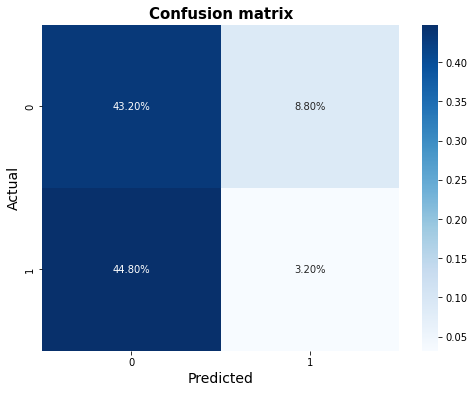

In [21]:
y_preds = xgboost_model.predict(test_feature)
plot_confusion_metrics(test_labels, y_preds)


In [23]:
imp_featur = pd.DataFrame({"Important Feature": xgboost_model.feature_importances_})
imp_featur['Feature'] = feature_columns
imp_featur = imp_featur.set_index('Feature')
imp_featur = imp_featur.sort_values(by=['Important Feature'], ascending=False)
imp_featur


,Important Feature
Feature,
Device make,0.20
Date of week,0.18
Date of month,0.17
Experiment,0.16
Hour,0.16
Browser,0.12
Platform os,0.00


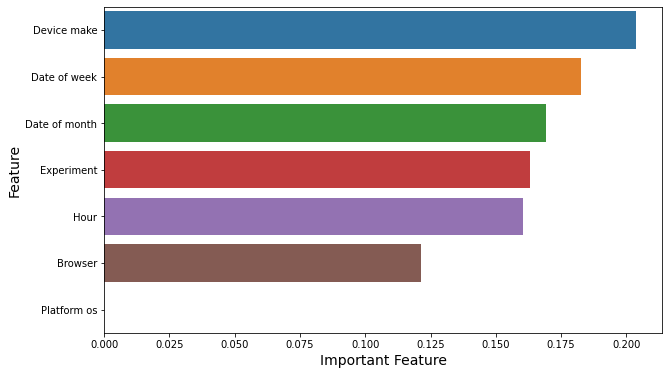

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Important Feature", y=imp_featur.index, data=imp_featur)
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Important Feature', fontsize=14)
plt.show()

In the above we can see that the features has almost the same role in determaining brand awerness.

